<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



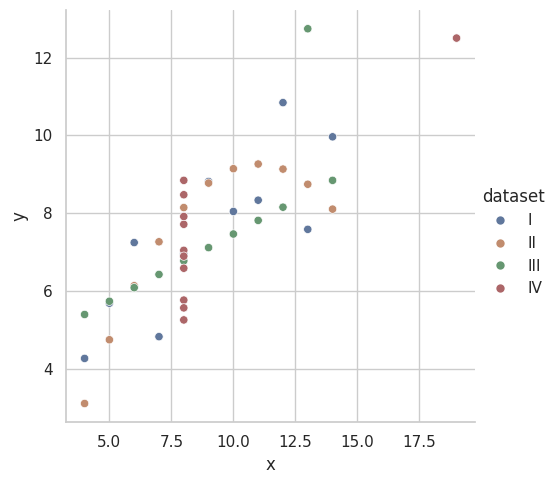

In [2]:
# FIXME
grafico = sns.relplot(x="x", y="y", hue="dataset", data=data, kind="scatter")
grafico


2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [3]:
# FIXME
data.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



In [7]:
# Fit a linear regression model for each dataset
models = {}
mse_scores = {}
r2_scores = {}

for dataset_name in sklearn_data['dataset'].unique():
    dataset_df = sklearn_data[sklearn_data['dataset'] == dataset_name]
    X = dataset_df[['x']]
    y = dataset_df['y']

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions and evaluate the model
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Store the results
    models[dataset_name] = model
    mse_scores[dataset_name] = mse
    r2_scores[dataset_name] = r2

# Display the evaluation metrics
print("MSE Scores:", mse_scores)
print("R2 Scores:", r2_scores)

MSE Scores: {'I': 1.2511536363636366, 'II': 1.2523900826446281, 'III': 1.2505628925619836, 'IV': 1.249317272727273}
R2 Scores: {'I': 0.6665424595087748, 'II': 0.6662420337274844, 'III': 0.6663240410665592, 'IV': 0.6667072568984653}


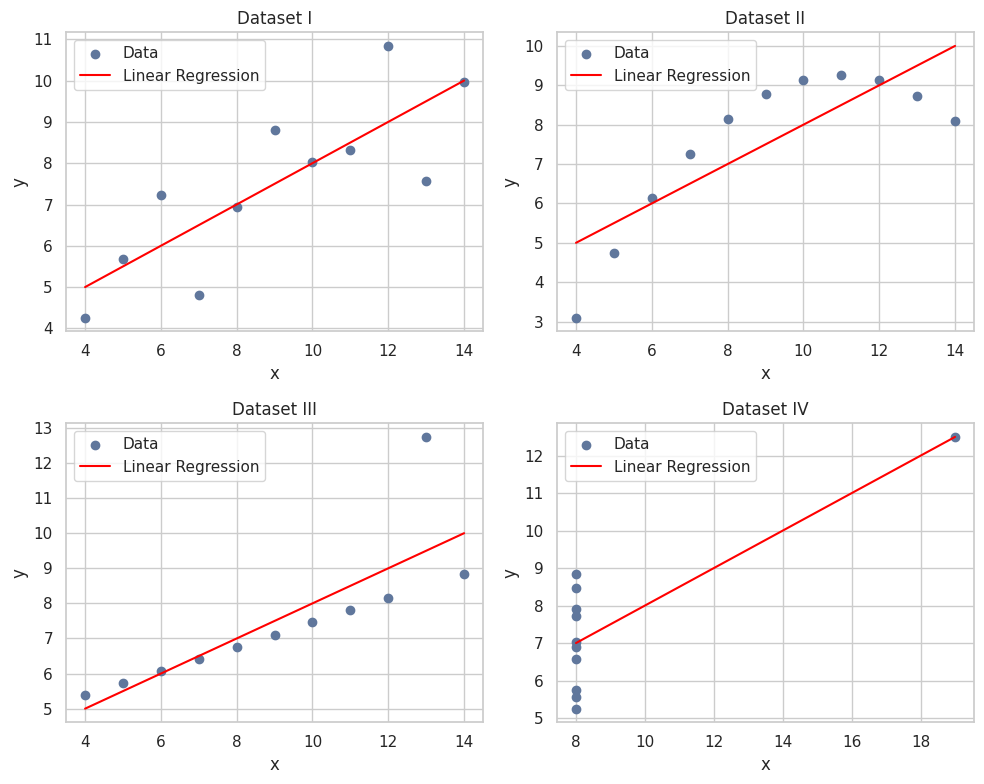

In [9]:
# Visualize the linear regression results for each dataset
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for i, dataset_name in enumerate(models.keys()):
    dataset_df = sklearn_data[sklearn_data['dataset'] == dataset_name]
    X = dataset_df[['x']]
    y = dataset_df['y']
    model = models[dataset_name]

    # Plot the scatter plot
    axes[i].scatter(X, y, label='Data')

    # Plot the linear regression line
    x_range = np.array([X.min(), X.max()])
    # Reshape x_range and create a DataFrame with the correct feature name
    x_range_df = pd.DataFrame(x_range.reshape(-1, 1), columns=['x'])
    y_range = model.predict(x_range_df)
    axes[i].plot(x_range, y_range, color='red', label='Linear Regression')

    axes[i].set_title(f'Dataset {dataset_name}')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].legend()

plt.tight_layout()
plt.show()

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

**RESPUESTA**:


Basado en las visualizaciones y métricas, los conjuntos de datos II, III y IV no se ajustan bien a un modelo lineal.

*   **Dataset II:** Presenta una relación no lineal (curva). Se podría considerar un modelo de regresión polinomial o no lineal.
*   **Dataset III:** Tiene un outlier que afecta significativamente la regresión lineal. Eliminar el outlier o usar un modelo de regresión robusta podría ser útil.
*   **Dataset IV:** La mayoría de los puntos están agrupados verticalmente con un outlier. Eliminar el outlier o usar un modelo que no asuma linealidad podría ser más apropiado.

Para mejorar el ajuste del modelo de regresión lineal en estos casos, se pueden implementar las estrategias mencionadas (detalladas en los puntos anteriores), dependiendo de las características específicas de cada conjunto de datos.